
# EE 461P: Data Science Principles
# Assignment 3
## Total points: 65
## Due: Tuesday, March 10th, submitted via Canvas by 11:59 pm

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Please ensure that the notebook you have uploaded on Canvas is the correct one, you could download the notebook from Canvas to double check that you have submitted the correct version on your notebook.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name(s)
1. Adit Jain (aj27923)
2. Blake Adams (baa2326)

# Question 1 - Regression using MLP (30 pts)

We will use the same dataset used in Homework 1 and try to design a MLP model for the same. 

Use the following code below to import the dataset.

In [63]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

random_num = 42

In [64]:
df = pd.read_csv('train.csv')
df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(0)
X = df.drop(['SalePrice'], axis=1)
Y = df['SalePrice']

For the below questions, use seed for random number as 42. You will need this seed for all instances of `train_test_split()` and `MLPRegressor()`.

a. **(4 pts)** Using Multi-layer Perceptron regressor, fit a regression model with `alpha=0` on all the feature variables using the entire dataset. Report the total of number of weights present in the weight matrix (obtained using `model.coefs_`) and evaluate the model using mean squared error (MSE). An example is shown in [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor).

In [65]:
model = MLPRegressor(alpha=0)
model.fit(X, Y)
print("Number of weights in MLPRegressor weight matrix: " + str(len(model.coefs_)))

preds = model.predict(X)
print("MSE of model: " + str(mean_squared_error(Y, preds)))

Number of weights in MLPRegressor weight matrix: 2
MSE of model: 2362969076.5107937


b. **(6 pts)** Split the data into a training set and a test set, using the train_test_split with `test_size = 0.25` and `random_state = 42`. Fit an MLP using the training set with `alpha=0` and `max_iter=1000`. Evaluate the trained model using the training set and the test set, respectively. Compare the two MSE values thus obtained. Give one reason behind the change in loss value.

In [66]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
model = MLPRegressor(alpha=0, max_iter=1000)
model.fit(x_train, y_train)
preds1 = model.predict(x_train)
preds2 = model.predict(x_test)
trainMSE = mean_squared_error(y_train, preds1)
testMSE = mean_squared_error(y_test, preds2)
print("MSE on training data: " + str(trainMSE))
print("MSE on test data: " + str(testMSE))
print("\nOne reasonable explanation for the decrease in MSE between the training set and the test set could be that the training set had 'hard' cases to learn or the test set had 'easy' cases to predict.")

MSE on training data: 2159291742.460134
MSE on test data: 1849760034.7068064

One reasonable explanation for the decrease in MSE between the training set and the test set could be that the training set had 'hard' cases to learn or the test set had 'easy' cases to predict.


c. **(5 pts)** Calculate the pearson correlation matrix of the independent variables in the training set. Show the correlation matrix as a [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) without annotations. Report the two features that are most positively and negatively correlated (excluding the same features) from the correlation matrix. [Sample code](https://stackoverflow.com/a/41453817)

Correlation Matrix
              MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass      1.000000    -0.215023 -0.139781     0.032628    -0.059316   
LotFrontage    -0.215023     1.000000  0.100739     0.176561    -0.053457   
LotArea        -0.139781     0.100739  1.000000     0.105806    -0.005636   
OverallQual     0.032628     0.176561  0.105806     1.000000    -0.091932   
OverallCond    -0.059316    -0.053457 -0.005636    -0.091932     1.000000   
MasVnrArea      0.023573     0.105010  0.103321     0.407252    -0.125694   
1stFlrSF       -0.251758     0.245181  0.299475     0.476224    -0.144203   
2ndFlrSF        0.307886     0.042549  0.050986     0.295493     0.028942   
GrLivArea       0.074853     0.220347  0.263116     0.593007    -0.079686   
FullBath        0.131608     0.120548  0.126031     0.550600    -0.194149   
HalfBath        0.177354    -0.012952  0.014259     0.273458    -0.060769   
BedroomAbvGr   -0.023438     0.144494  0.119690     0.101

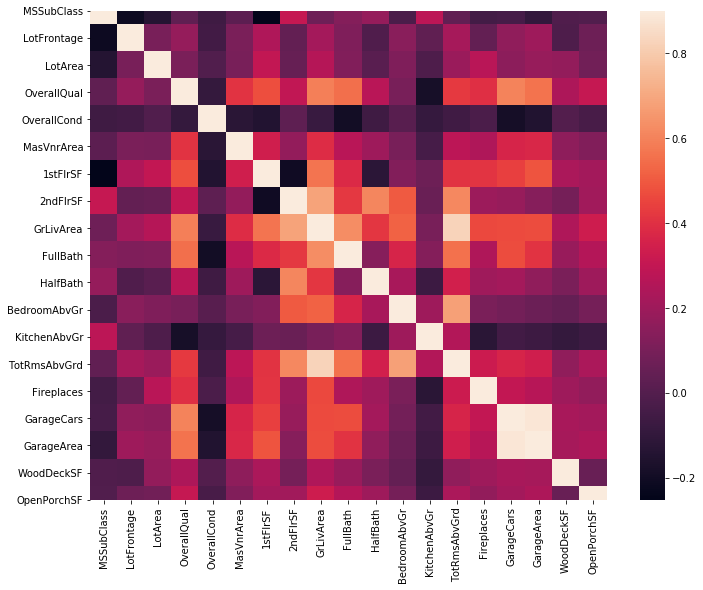

In [67]:
print("Correlation Matrix")
corrmat = X.corr()
print(corrmat)
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)


In [41]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("\nTop Absolute Correlations")
print(get_top_abs_correlations(X, 4))
print("\nTop two features that are positively correlated: GarageCars and GarageArea (pearson correlation = 0.882475)")
print("Top two features that are negatively correlated: MSSubClass and 1stFlrSF(pearson correlation = -0.251758)")


Top Absolute Correlations
GarageCars    GarageArea      0.882475
GrLivArea     TotRmsAbvGrd    0.825489
2ndFlrSF      GrLivArea       0.687501
BedroomAbvGr  TotRmsAbvGrd    0.676620
dtype: float64

Top two features that are positively correlated: GarageCars and GarageArea (pearson correlation = 0.882475)
Top two features that are negatively correlated: MSSubClass and 1stFlrSF(pearson correlation = -0.251758)


d. **(6 pts)** Run MLPRegressor like part (a) but this time, use different values for alpha, which is the L2 penalty (regularization term) parameter. Take at least 10 values of alpha within the range of [0, 0.001]. Plot the MSE for various values of alpha. Explain the value of alpha that gives the minimum MSE. What does this mean?.

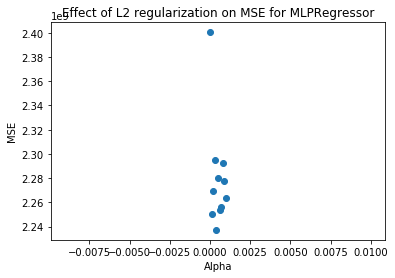

In [52]:
alphas = np.arange(0,0.0011, 0.0001)
mse = []
for alpha in alphas:
    model = MLPRegressor(alpha=alpha)
    model.fit(X,Y)
    preds = model.predict(X)
    MSE = mean_squared_error(Y, preds)
    mse.append(MSE)
    
plt.scatter(x=alphas, y=mse)
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.title("Effect of L2 regularization on MSE for MLPRegressor")
plt.show()

In [62]:
minAlpha = min(mse)
chosenAlpha = alphas[mse.index(minAlpha)]
print("Smallest MES = " + str(minAlpha) + " with alpha = " + str(chosenAlpha))
print("\nIn L2 Regularization, the regularization term is the sum of of sqaures of all the feature weights. This type of regularization punishes high weights in the model but does not make them zero. This value of alpha, which is part of the regularization term, results in the lowest MSE score within the hyperparameter values we tried for our model [0, 0.001]. ")


Smallest MES = 2237188727.082351 with alpha = 0.0004

In L2 Regularization, the regularization term is the sum of of sqaures of all the feature weights. This type of regularization punishes high weights in the model but does not make them zero. This value of alpha, which is part of the regularization term, results in the lowest MSE score within the hyperparameter values we tried for our model [0, 0.001]. 


# Question 2 - Decision Tree Classifier (20 pts)
**Customer Eligibility for Deposits**

Predict if a customer will subscribe (yes/no) to a fixed deposit, by building a classification model using Decision Tree.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
%matplotlib inline

In [0]:
# Loading the data file
bank=pd.read_csv('bank.csv')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


Input variables:
# bank client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'primary', 'secondary','tertiary')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - balance: account balance

7 - housing: has housing loan? (categorical: 'no','yes','unknown')

8 - loan: has personal loan? (categorical: 'no','yes','unknown')

# related with the last contact of the current campaign:
9 - contact: contact communication type (categorical: 'cellular','telephone')

10 - day_of_month : 1,2....31

11 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

12 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 10000 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','other','success','unknown')

Output variable (desired target):
17 - y - has the client subscribed a term deposit? (binary: 'yes','no')

**All the pre-processing is done where the categorical variables are converted to numeric values and unnecessary columns are dropped.**

In [0]:
# Make a copy for parsing
bank_data = bank.copy()

In [0]:
# Drop 'contact', as every participant has been contacted. 
bank_data.drop('contact', axis=1, inplace=True)
# Drop 'month' and 'day' as they don't have any intrinsic meaning
bank_data.drop('month', axis=1, inplace=True)
bank_data.drop('day', axis=1, inplace=True)

In [0]:
#Convert categorical values to numeric values
# values for "default" : yes/no
bank_data["default"]
bank_data['default_cat'] = bank_data['default'].map( {'yes':1, 'no':0} )
bank_data.drop('default', axis=1,inplace = True)
# values for "housing" : yes/no
bank_data["housing_cat"]=bank_data['housing'].map({'yes':1, 'no':0})
bank_data.drop('housing', axis=1,inplace = True)
# values for "loan" : yes/no
bank_data["loan_cat"] = bank_data['loan'].map({'yes':1, 'no':0})
bank_data.drop('loan', axis=1, inplace=True)
# values for "deposit" : yes/no
bank_data["deposit_cat"] = bank_data['deposit'].map({'yes':1, 'no':0})
bank_data.drop('deposit', axis=1, inplace=True)

# Convert categorical variables to dummies
bank_data = pd.get_dummies(data=bank_data, columns = ['job', 'marital', 'education', 'poutcome'], \
                                   prefix = ['job', 'marital', 'education', 'poutcome'])

In [0]:
# Convert p_days to a probability value
bank_data['recent_pdays'] = np.where(bank_data['pdays'], 1/bank_data.pdays, 1/bank_data.pdays)
# Drop 'pdays'
bank_data.drop('pdays', axis=1, inplace = True)

In [0]:
bank_data.head()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,recent_pdays
0,59,2343,1042,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,-1.0
1,56,45,1467,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,-1.0
2,41,1270,1389,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,-1.0
3,55,2476,579,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,-1.0
4,54,184,673,2,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,-1.0


In [0]:
# Splitting the data into training and test data with 80:20 ratio with random_state=50.
# Building the data model
# Train-Test split: 20% test data
X = bank_data.drop('deposit_cat', 1)
Y = bank_data.deposit_cat
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 50)

a. **(8 pts)** Build a decision tree with depths 2,3,5,10 and max depth using gini and entropy criterion; report the train and test error.

b. **(2 pts)** Explain how the train and test accuracy vary as we increase the depth of the tree.

c. **(4 pts)** List the most important features for the tree with depth=2 and criterion=gini and plot the tree.

d. **(6 pts)** Report the accuracy and AUC for the test data and plot the ROC curve.

# Question 3 - Bayes Decision Theory (10pts)

a. (2pts) Explain what you understand by class-conditional likelihood, class priors, and posterior probability of a class given an input, and the relationship between them. Please define all symbols and equations used explicitly.

b. (5pts) Suppose you want to learn a binary classifier to predict whether or not a customer will buy a TV. The class label is 1 if the customer buys and 2 if he/she does not. For each customer, you are given two features, $x_1$ is the salary per hour and $x_2$ is the age. Assume that the class conditional distribution $p(x_1,x_2|C)$ is Gaussian for both classes. The mean salary and age of the people who do buy a TV is 30 and 39 respectively and that of those who don't is 16 and 20. Also assume that covariances of these two groups are given by $I$ (for "buy class") and $4I$ respectively, where $I$ is the identity matrix. Further, your sales data suggests that only 1 in 5 people actually buy a TV. Mathematically derive the (optimal) Bayes decision boundary for this problem.

c. (3pts) Write a script to sample 100 customers from class (C = 1) and correspondingly from class 2, under the assumed distribution and the estimated parameters and create a scatter plot. Plot the decision boundary you obtained in  part (b) on the same plot. (You can hardcode the co-efficient values for the deicision boundary)


# Question 4 - Asymmetric Cost Function (5pts)

Consider the loss matrix below specified for a certain 3-class problem:

|       |       | $C_1$ |   $C_2$  | $C_3$ |
|-------|-------|-------|:--------:|-------|
|       | $C_1$ | 3     |     4    | 5     |
| Truth | $C_2$ | 8     |     0    | 2     |
|       | $C_3$ | -6    |     0    | -8    |
|       |       |       | Decision |       |

For what range of values of $P(C_1|x)$ will you declare x to belong to Class 1 if your goal is to minimize the expected loss rather than minimizing misclassification error? To make this problem simpler, assume that  $P(C_2|x) = P(C_3|x)$ for all x.